In [1]:
import random
import math
import cmath
import numpy as np
import sympy as sp
from sympy.vector import Del
from sympy import I as J
import scipy.stats as stats
from scipy.special import perm, comb, factorial
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import control as ct
sp.init_printing()

In [2]:
data_file = "./walking_triangle_counter_clockwise.csv"
# data_file = "walking_path_3.csv"
# data_file = "spinning_in_place_counter_clockwise.csv"

In [3]:
# load CSV into dataframe
df = pd.read_csv(data_file)

# filter dataframe by type
ios_df = df[ df['type'] == 'ios' ]
anchor_df = df[ df['type'] == 'anchor' ]

# sort dataframes by timestamp
ios_df = ios_df.sort_values(by=['timestamp'])
anchor_df = anchor_df.sort_values(by=['timestamp'])

display(ios_df)
display(anchor_df)

,type,aid,timestamp,status,distance_m,azimuth_deg,elevation_deg,los
7,ios,0,9.720,NaN,5.172619,0.0,141.0,0.0
31,ios,0,11.335,NaN,5.177308,0.0,141.0,0.0
32,ios,0,11.335,NaN,5.187023,0.0,141.0,0.0
33,ios,0,11.335,NaN,5.183184,0.0,141.0,0.0
34,ios,0,11.335,NaN,5.187921,0.0,141.0,0.0
...,...,...,...,...,...,...,...,...
648,ios,3,26.864,NaN,3.663999,-59.0,94.0,0.0
650,ios,1,26.894,NaN,2.728111,75.0,128.0,1.0
653,ios,2,26.966,NaN,5.240634,0.0,141.0,0.0
656,ios,3,27.071,NaN,3.599124,-59.0,94.0,0.0


,type,aid,timestamp,status,distance_m,azimuth_deg,elevation_deg,los
0,anchor,2,0.012,2.0,0.000,NaN,NaN,NaN
1,anchor,3,0.012,2.0,0.000,NaN,NaN,NaN
2,anchor,0,0.012,2.0,0.000,NaN,NaN,NaN
3,anchor,1,0.012,2.0,0.000,NaN,NaN,NaN
4,anchor,0,9.318,2.0,0.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
658,anchor,0,27.147,0.0,7.157,NaN,NaN,NaN
660,anchor,1,27.235,2.0,0.000,NaN,NaN,NaN
661,anchor,3,27.248,2.0,0.000,NaN,NaN,NaN
662,anchor,2,27.272,2.0,0.000,NaN,NaN,NaN


In [4]:
# compare ios vs anchor distance readings for each anchor

###################################################################################################
a0_ios_time = np.array( ios_df.loc[ios_df['aid'] == 0]['timestamp'] )
a1_ios_time = np.array( ios_df.loc[ios_df['aid'] == 1]['timestamp'] )
a2_ios_time = np.array( ios_df.loc[ios_df['aid'] == 2]['timestamp'] )
a3_ios_time = np.array( ios_df.loc[ios_df['aid'] == 3]['timestamp'] )

a0_ios_distance = np.array( ios_df.loc[ios_df['aid'] == 0]['distance_m'] )
a1_ios_distance = np.array( ios_df.loc[ios_df['aid'] == 1]['distance_m'] )
a2_ios_distance = np.array( ios_df.loc[ios_df['aid'] == 2]['distance_m'] )
a3_ios_distance = np.array( ios_df.loc[ios_df['aid'] == 3]['distance_m'] )

a0_ios_angle = np.array( ios_df.loc[ios_df['aid'] == 0]['azimuth_deg'] )
a1_ios_angle = np.array( ios_df.loc[ios_df['aid'] == 1]['azimuth_deg'] )
a2_ios_angle = np.array( ios_df.loc[ios_df['aid'] == 2]['azimuth_deg'] )
a3_ios_angle = np.array( ios_df.loc[ios_df['aid'] == 3]['azimuth_deg'] )

a0_ios_los = np.array( ios_df.loc[ios_df['aid'] == 0]['los'] )
a1_ios_los = np.array( ios_df.loc[ios_df['aid'] == 1]['los'] )
a2_ios_los = np.array( ios_df.loc[ios_df['aid'] == 2]['los'] )
a3_ios_los = np.array( ios_df.loc[ios_df['aid'] == 3]['los'] )
###################################################################################################


###################################################################################################
# anchor data
a0_anchor_time     = np.array( anchor_df.loc[anchor_df['aid'] == 0]['timestamp'] )
a1_anchor_time     = np.array( anchor_df.loc[anchor_df['aid'] == 1]['timestamp'] )
a2_anchor_time     = np.array( anchor_df.loc[anchor_df['aid'] == 2]['timestamp'] )
a3_anchor_time     = np.array( anchor_df.loc[anchor_df['aid'] == 3]['timestamp'] )

a0_anchor_distance = np.array( anchor_df.loc[anchor_df['aid'] == 0]['distance_m'] )
a1_anchor_distance = np.array( anchor_df.loc[anchor_df['aid'] == 1]['distance_m'] )
a2_anchor_distance = np.array( anchor_df.loc[anchor_df['aid'] == 2]['distance_m'] )
a3_anchor_distance = np.array( anchor_df.loc[anchor_df['aid'] == 3]['distance_m'] )

# status != 0 means an error, get the timestamps where there is an error
a0_anchor_status = np.array( anchor_df.loc[anchor_df['aid'] == 0]['status'] )
a1_anchor_status = np.array( anchor_df.loc[anchor_df['aid'] == 1]['status'] )
a2_anchor_status = np.array( anchor_df.loc[anchor_df['aid'] == 2]['status'] )
a3_anchor_status = np.array( anchor_df.loc[anchor_df['aid'] == 3]['status'] )
###################################################################################################

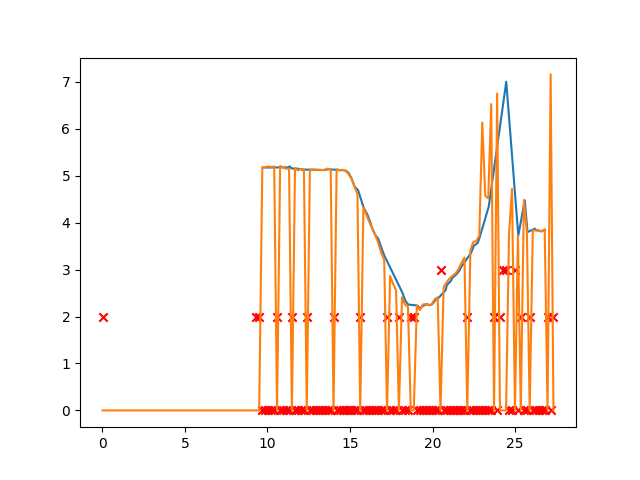

In [5]:
%matplotlib widget

"""
DISTANCE VS TIME FOR ANCHOR 0
"""

plt.figure()

plt.plot(a0_ios_time, a0_ios_distance, label='a0_ios')
plt.plot(a0_anchor_time, a0_anchor_distance, label='a0_anchor')
plt.scatter(a0_anchor_time, a0_anchor_status, label='a0_anchor_status', marker='x', color='red')
plt.show()

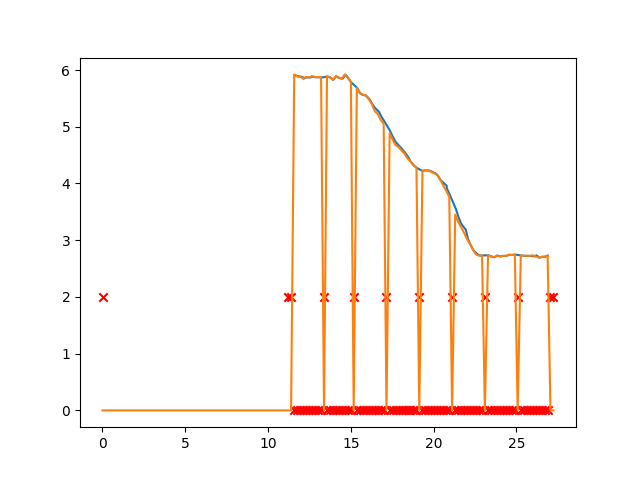

In [6]:
%matplotlib widget

"""
DISTANCE VS TIME FOR ANCHOR 1
"""

plt.figure()

plt.plot(a1_ios_time, a1_ios_distance, label='a1_ios')
plt.plot(a1_anchor_time, a1_anchor_distance, label='a1_anchor')
plt.scatter(a1_anchor_time, a1_anchor_status, label='a1_anchor_status', marker='x', color='red')
plt.show()

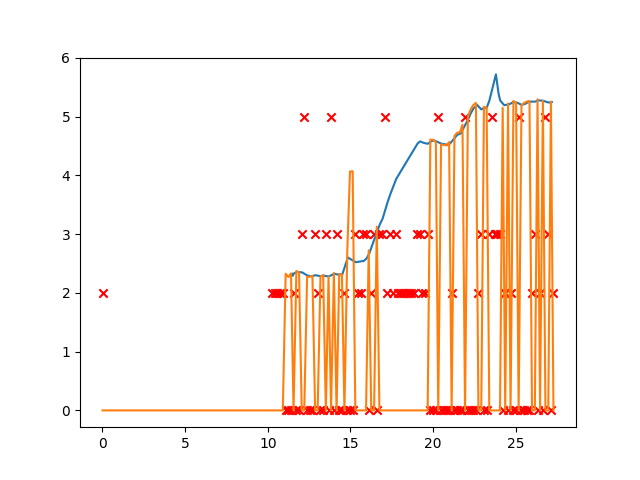

In [7]:
%matplotlib widget

"""
DISTANCE VS TIME FOR ANCHOR 2
"""

plt.figure()

plt.plot(a2_ios_time, a2_ios_distance, label='a2_ios')
plt.plot(a2_anchor_time, a2_anchor_distance, label='a2_anchor')
plt.scatter(a2_anchor_time, a2_anchor_status, label='a2_anchor_status', marker='x', color='red')
plt.show()

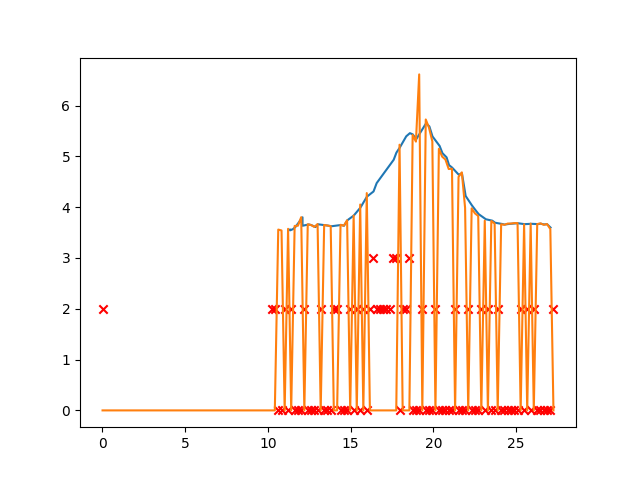

In [8]:
%matplotlib widget

"""
DISTANCE VS TIME FOR ANCHOR 3
"""

plt.figure()

plt.plot(a3_ios_time, a3_ios_distance, label='a3_ios')
plt.plot(a3_anchor_time, a3_anchor_distance, label='a3_anchor')
plt.scatter(a3_anchor_time, a3_anchor_status, label='a3_anchor_status', marker='x', color='red')
plt.show()

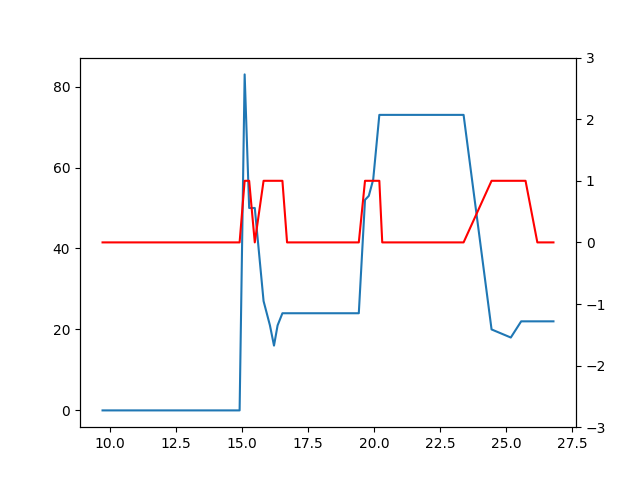

In [9]:
%matplotlib widget

"""
ANGLE AND LOS VS TIME FOR ANCHOR 0
"""

plt.figure()

plt.plot(a0_ios_time, a0_ios_angle)

ax2 = plt.twinx()
ax2.set_ylim([-3, 3])
ax2.plot(a0_ios_time, a0_ios_los, color="r")

plt.show()

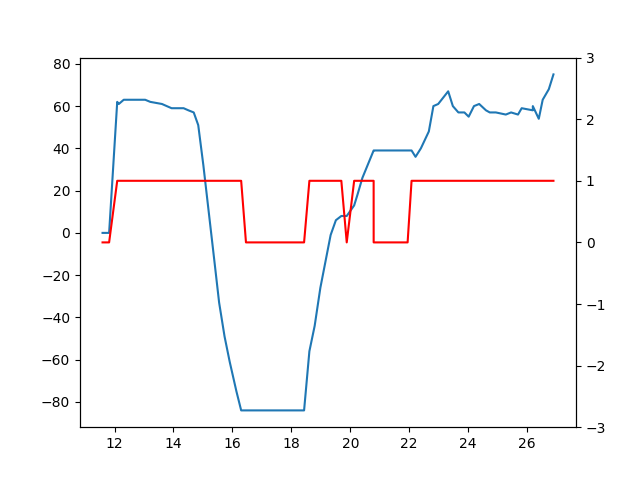

In [10]:
%matplotlib widget

"""
ANGLE AND LOS VS TIME FOR ANCHOR 1
"""

plt.figure()

plt.plot(a1_ios_time, a1_ios_angle)

ax2 = plt.twinx()
ax2.set_ylim([-3, 3])
ax2.plot(a1_ios_time, a1_ios_los, color="r")

plt.show()

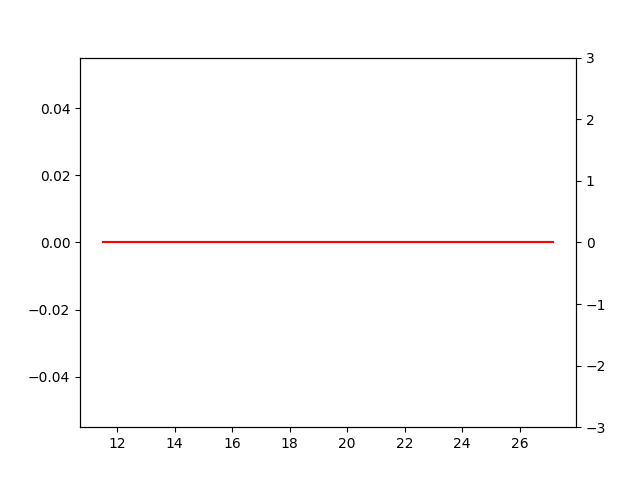

In [11]:
%matplotlib widget

"""
ANGLE AND LOS VS TIME FOR ANCHOR 2
"""

plt.figure()

plt.plot(a2_ios_time, a2_ios_angle)

ax2 = plt.twinx()
ax2.set_ylim([-3, 3])
ax2.plot(a2_ios_time, a2_ios_los, color="r")

plt.show()

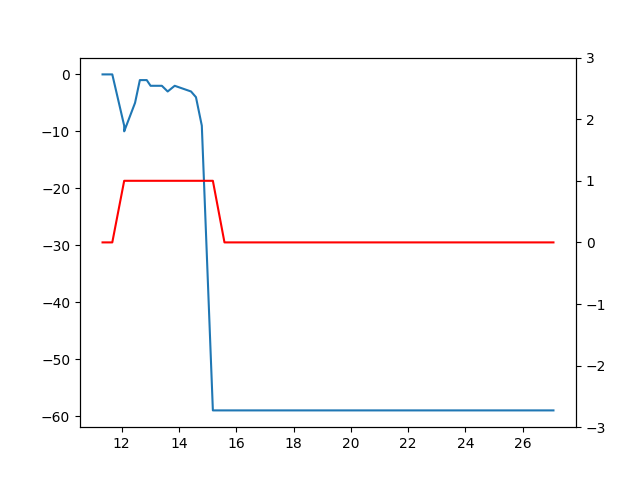

In [12]:
%matplotlib widget

"""
ANGLE AND LOS VS TIME FOR ANCHOR 3
"""

plt.figure()

plt.plot(a3_ios_time, a3_ios_angle)

ax2 = plt.twinx()
ax2.set_ylim([-3, 3])
ax2.plot(a3_ios_time, a3_ios_los, color="r")

plt.show()

In [13]:
"""
SAMPLING TIME ANALYSIS FOR EACH ANCHOR

expected sampling time is 1 / 5.5Hz = 0.1818 s
"""

def get_time_diffs(time_arr):
    ret = []

    for i in range(len(time_arr) - 1):
        ret.append(time_arr[i + 1] - time_arr[i])

    return ret

a0_time_diffs = get_time_diffs(a0_ios_time)
a1_time_diffs = get_time_diffs(a1_ios_time)
a2_time_diffs = get_time_diffs(a2_ios_time)
a3_time_diffs = get_time_diffs(a3_ios_time)


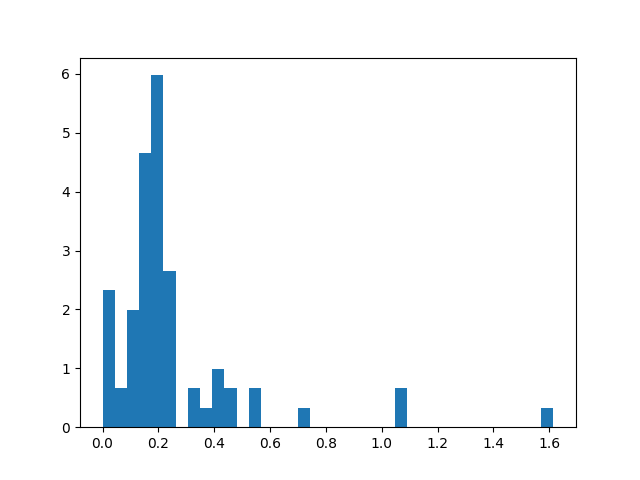

In [14]:
%matplotlib widget

"""
SAMPLING TIME DISTRIBUTION FOR ANCHOR 0
"""

plt.figure()

plt.hist(a0_time_diffs, density=True, bins='auto')
plt.show()

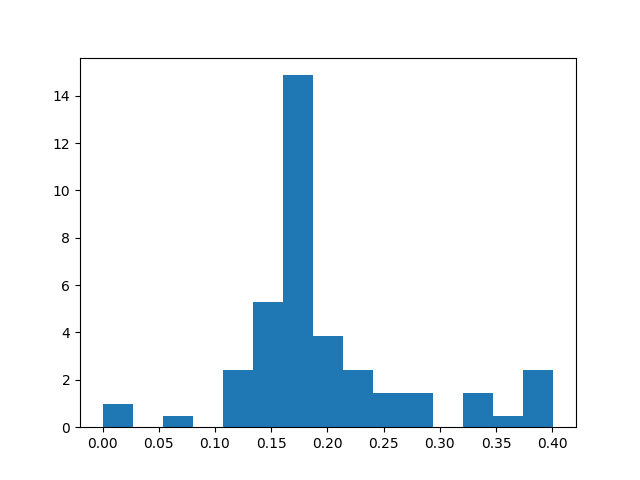

In [15]:
%matplotlib widget

"""
SAMPLING TIME DISTRIBUTION FOR ANCHOR 1
"""

plt.figure()

plt.hist(a1_time_diffs, density=True, bins='auto')
plt.show()

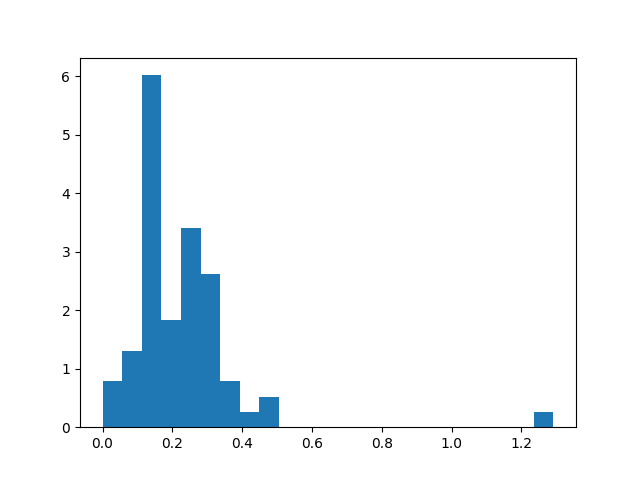

In [16]:
%matplotlib widget

"""
SAMPLING TIME DISTRIBUTION FOR ANCHOR 2
"""

plt.figure()

plt.hist(a2_time_diffs, density=True, bins='auto')
plt.show()

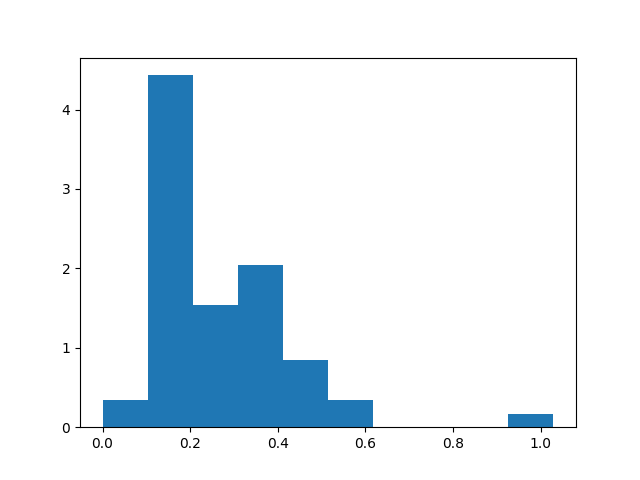

In [17]:
%matplotlib widget

"""
SAMPLING TIME DISTRIBUTION FOR ANCHOR 3
"""

plt.figure()

plt.hist(a3_time_diffs, density=True, bins='auto')
plt.show()